In [8]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np
import math

In [9]:
def load_surf_swarm(fdir,step,KL):
    fname = fdir+"surfaceSwarm"+str(step).zfill(4)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]*KL
    ycoord = fdata[:,1]*KL
    return xcoord,ycoord

def load_depth(fdir,maxstep,KL):
    depth_l = []
    depth_r = []
    for step in range(1,maxstep+1):
        xcoord,ycoord = load_surf_swarm(fdir,step,KL)
        depth_l.append(ycoord[0])   
        depth_r.append(ycoord[-1])  
    return np.array(depth_l),np.array(depth_r)

### FSSA vs noFSSA vs FreeSlip

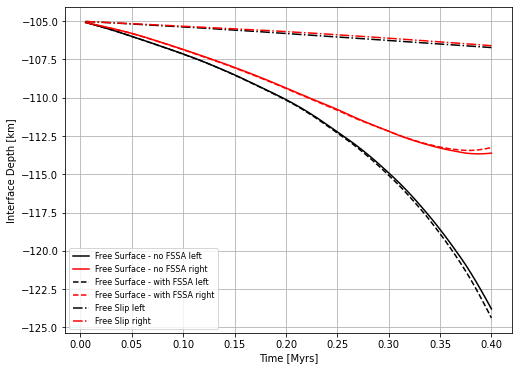

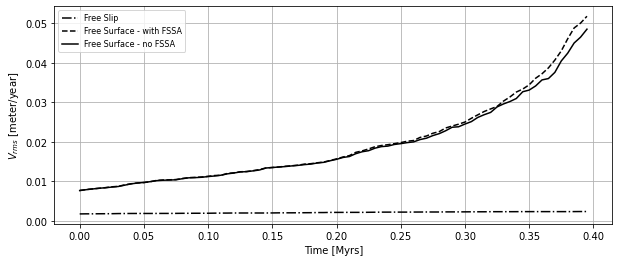

In [24]:
maxstep = 80
dt = 5 #kyrs
KL = 500
times = np.arange(dt,dt*maxstep+1,dt)

fdir0 = "Kaus2010_RTI_FreeSlip/"
fdir1 = "Kaus2010_RTIwithFSSA_theta1.0/"
fdir2 = "Kaus2010_RTInoFSSA/"

depth0_l,depth0_r= load_depth(fdir0,maxstep,KL)
depth1_l,depth1_r= load_depth(fdir1,maxstep,KL)
depth2_l,depth2_r= load_depth(fdir2,maxstep,KL)
    
fname = "Depth of the interface at x=−250km and x=250km versus time for the free surface simulations"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(times/1000,depth2_l,'k',label= "Free Surface - no FSSA left")
ax.plot(times/1000,depth2_r,'r',label= "Free Surface - no FSSA right")

ax.plot(times/1000,depth1_l,'--k',label= "Free Surface - with FSSA left")
ax.plot(times/1000,depth1_r,'--r',label= "Free Surface - with FSSA right")

ax.plot(times/1000,depth0_l,'-.k',label= "Free Slip left")
ax.plot(times/1000,depth0_r,'-.r',label= "Free Slip right")

#ax.set_xlim([0,2800])
ax.grid()
plt.legend(loc = 'lower left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')




fname = "Comparison of the evolution of rms velocity"
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set(xlabel='Time [Myrs]', ylabel='$V_{rms}$ [meter/year]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)

data = np.loadtxt(fdir0+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'-.k',label="Free Slip")

data = np.loadtxt(fdir1+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'--k',label="Free Surface - with FSSA")

data = np.loadtxt(fdir2+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'k',label="Free Surface - no FSSA")

# maxIndex = np.argmax(data[1])
# print('case1: ')
# print('    t(max vrms) = {0:.2f}'.format(data[0][maxIndex]))
# print('           vrms = {0:.4e}'.format(data[1][maxIndex]))

ax.grid()
plt.legend(loc = 'upper left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight') 

### FSSA with theta = 0.0 vs 0.5 vs 1.0 

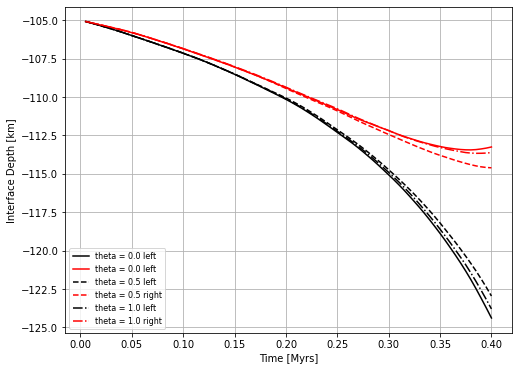

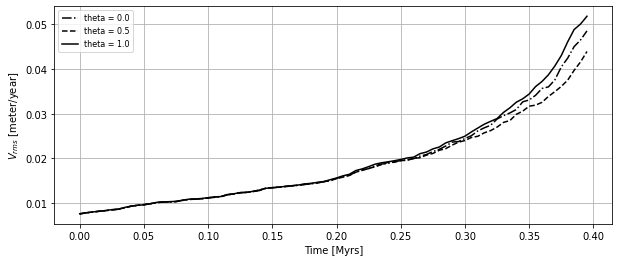

In [25]:
maxstep = 80
dt = 5 #kyrs
KL = 500
times = np.arange(dt,dt*maxstep+1,dt)

fdir0 = "Kaus2010_RTIwithFSSA_theta0.0/"
fdir1 = "Kaus2010_RTIwithFSSA_theta0.5/"
fdir2 = "Kaus2010_RTIwithFSSA_theta1.0/"

depth0_l,depth0_r= load_depth(fdir0,maxstep,KL)
depth1_l,depth1_r= load_depth(fdir1,maxstep,KL)
depth2_l,depth2_r= load_depth(fdir2,maxstep,KL)

fname = "Depth of the interface at x=−250km and x=250km versus time for FSSA with diferent theta"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(times/1000,depth2_l,'k',label= "theta = 0.0 left")
ax.plot(times/1000,depth2_r,'r',label= "theta = 0.0 left")

ax.plot(times/1000,depth1_l,'--k',label= "theta = 0.5 left")
ax.plot(times/1000,depth1_r,'--r',label= "theta = 0.5 right")

ax.plot(times/1000,depth0_l,'-.k',label= "theta = 1.0 left")
ax.plot(times/1000,depth0_r,'-.r',label= "theta = 1.0 right")

#ax.set_xlim([0,2800])
ax.grid()
plt.legend(loc = 'lower left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')

fname = "Comparison of the evolution of rms velocity for FSSA with diferent theta"
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set(xlabel='Time [Myrs]', ylabel='$V_{rms}$ [meter/year]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)

data = np.loadtxt(fdir0+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'-.k',label="theta = 0.0")

data = np.loadtxt(fdir1+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'--k',label="theta = 0.5")

data = np.loadtxt(fdir2+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'k',label="theta = 1.0")

# maxIndex = np.argmax(data[1])
# print('case1: ')
# print('    t(max vrms) = {0:.2f}'.format(data[0][maxIndex]))
# print('           vrms = {0:.4e}'.format(data[1][maxIndex]))

ax.grid()
plt.legend(loc = 'upper left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight') 

### FreeSlip

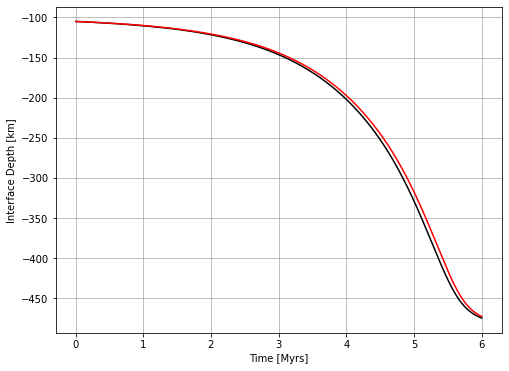

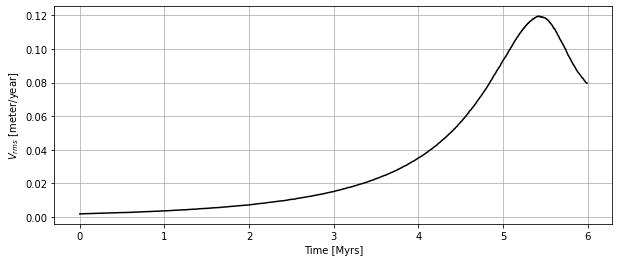

In [29]:
maxstep = 1200
dt = 5 #kyrs
KL = 500
times = np.arange(dt,dt*maxstep+1,dt)

fdir0 = "Kaus2010_RTI_FreeSlip_5ka/"

depth_l,depth_r= load_depth(fdir0,maxstep,KL)

fname = "Depth of the interface at x=−250km and x=250km versus time for FreeSlip"
fig, ax = plt.subplots(1, 1, figsize=(8,6))
ax.set(xlabel='Time [Myrs]', ylabel='Interface Depth [km]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(times/1000,depth_l,'k',label= "theta = 0.0 left")
ax.plot(times/1000,depth_r,'r',label= "theta = 0.0 left")
#ax.set_xlim([0,2800])
ax.grid()
#plt.legend(loc = 'lower left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight')


fname = "Comparison of the evolution of rms velocity for FreeSlip"
fig, ax = plt.subplots(1, 1, figsize=(10,4))
ax.set(xlabel='Time [Myrs]', ylabel='$V_{rms}$ [meter/year]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)

data = np.loadtxt(fdir0+"data_time_vrms.txt", unpack=True)
ax.plot(data[0]/1000,data[1],'k',label="theta = 0.0")

# maxIndex = np.argmax(data[1])
# print('case1: ')
# print('    t(max vrms) = {0:.2f}'.format(data[0][maxIndex]))
# print('           vrms = {0:.4e}'.format(data[1][maxIndex]))
ax.grid()
#plt.legend(loc = 'upper left',prop = {'size':8})
plt.savefig(fname,dpi=150,bbox_inches='tight') 